In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://tianchi.aliyun.com/dataset/dataDetail?spm=5176.12282024.0.0.408d4d4arsQvyr&dataId=2581&userId=1

---------------------------------------------------------
- cand_nm：接受捐赠的候选人姓名
- contbr_nm：捐赠人姓名
- contbr_st：捐赠人所在州
- contbr_employer：捐赠人所在公司
- contbr_occupation：捐赠人职业
- contb_receipt_amt：捐赠数额（美元）
- contb_receipt_dt：收到捐款的日期

In [3]:
#数据导入
rootdir = 'D:/Project/04 tianchi/01 dataset/2012 Federal Election/'

data_01 = pd.read_csv(rootdir + 'data_01.csv')
data_02 = pd.read_csv(rootdir + 'data_02.csv')
data_03 = pd.read_csv(rootdir + 'data_03.csv')

In [4]:
data = pd.concat([data_01,data_02,data_03])

In [5]:
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [6]:
# 查看数据的信息，包括每个字段的名称、非空数量、字段的数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001729 non-null  object 
 3   contbr_employer    988004 non-null   object 
 4   contbr_occupation  993303 non-null   object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [7]:
# 用统计学指标快速描述数据的概要
data.describe()

,contb_receipt_amt
count,1.001733e+06
mean,2.982358e+02
std,3.749663e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


In [8]:
# 从data.info()得知，contbr_employer、contbr_occupation均有少量缺失值,均填充为NOT PROVIDED
data['contbr_employer'].fillna('NOT PROVIDED',inplace=True)
data['contbr_occupation'].fillna('NOT PROVIDED',inplace=True)

In [9]:
# 查看数据中总统候选人
print('共有{}位候选人，分别是'.format(len(data['cand_nm'].unique())))
data['cand_nm'].unique()

共有13位候选人，分别是


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [13]:
# 通过搜索引擎等途径，获取到每个总统候选人的所属党派，建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [14]:
# 通过map映射函数，增加一列party存储党派信息
data['party']=data['cand_nm'].map(parties)
# 查看两个党派的情况
data['party'].value_counts()

Democrat      593747
Republican    407986
Name: party, dtype: int64

In [15]:
data.groupby('contbr_occupation')

In [16]:
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False)[:20]

contbr_occupation
RETIRED                                   48176647.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDED                               4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

In [17]:
# 建立一个职业对应字典，把相同职业的不同表达映射为对应的职业，比如把C.E.O.映射为CEO
occupation_map = {
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
    'C.E.O.':'CEO',
    'LAWYER':'ATTORNEY',
}

# 如果不在字典中,返回x
f = lambda x: occupation_map.get(x, x)
data.contbr_occupation = data.contbr_occupation.map(f)

In [18]:
# 对雇主信息进行类似转换
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# 如果不在字典中,返回x
f = lambda x: emp_mapping.get(x, x)
data.contbr_employer = data.contbr_employer.map(f)

In [19]:
# 赞助金额筛选。赞助包括退款（负的出资额），为了简化分析过程，限定数据集只有正出资额
data = data[data['contb_receipt_amt']>0]

In [20]:
# 查看各候选人获得的赞助总金额
data.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)

cand_nm
Obama, Barack                     1.358776e+08
Romney, Mitt                      8.833591e+07
Paul, Ron                         2.100962e+07
Perry, Rick                       2.030675e+07
Gingrich, Newt                    1.283277e+07
Santorum, Rick                    1.104316e+07
Cain, Herman                      7.101082e+06
Pawlenty, Timothy                 6.004819e+06
Huntsman, Jon                     3.330373e+06
Bachmann, Michelle                2.711439e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.730099e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64

In [21]:
# 选取候选人为Obama、Romney的子集数据
data_vs = data[data['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])].copy()

In [23]:
data_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican


In [24]:
# 利用cut函数根据出资额大小将数据离散化到多个面元中
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(data_vs['contb_receipt_amt'],bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
201381      (10, 100]
201382    (100, 1000]
201383        (1, 10]
201384      (10, 100]
201385    (100, 1000]
Name: contb_receipt_amt, Length: 694283, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [25]:
# 按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
by_occupation = data.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')

# 过滤掉赞助金额小于200W的数据
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,14302461.84,7.868419e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
MANAGER,762883.22,1.444532e+06
NOT PROVIDED,13725187.32,2.097161e+07


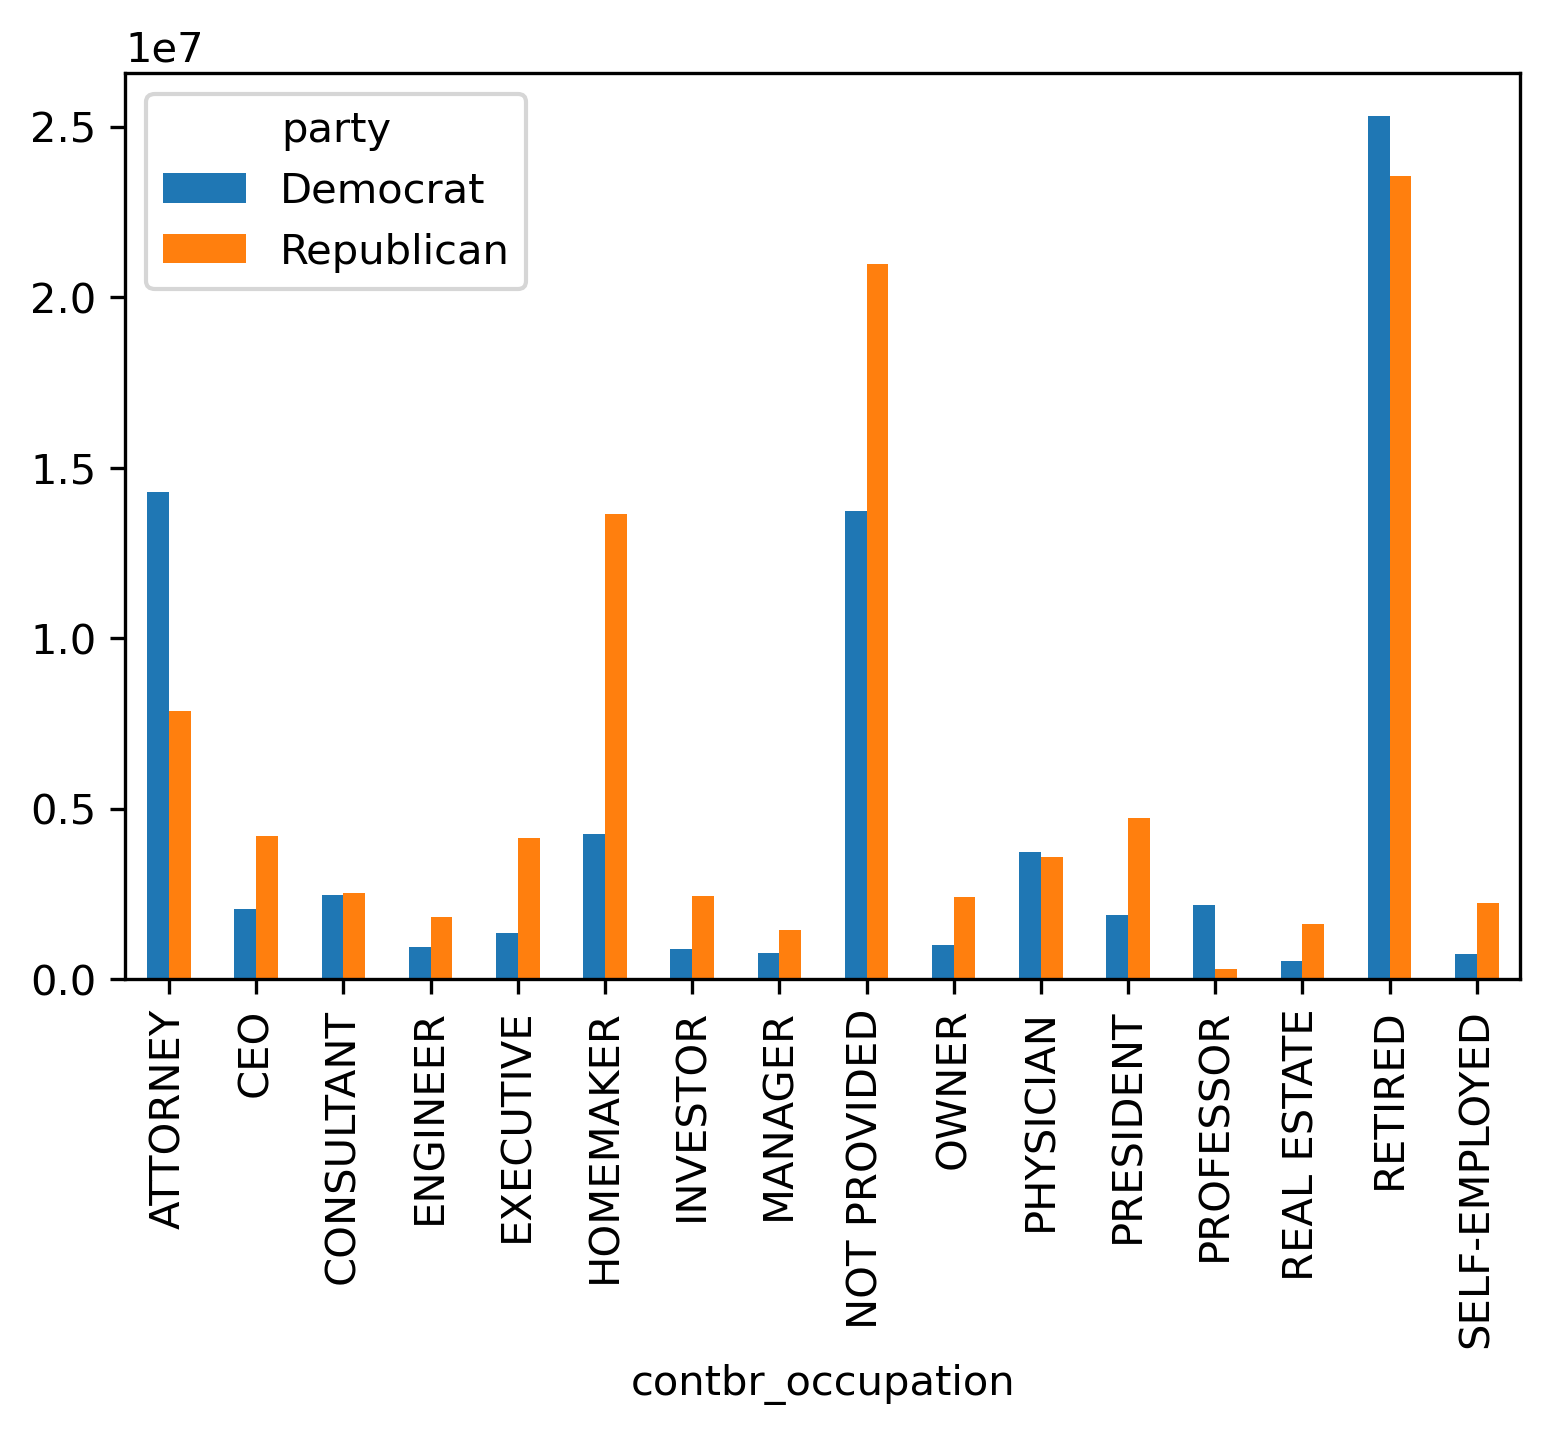

In [27]:
plt.rcParams['figure.dpi'] = 300
over_2mm.plot(kind='bar')

In [28]:
# 由于职业和雇主的处理非常相似，定义函数get_top_amounts()对两个字段进行分析处理
def get_top_amounts(group,key,n=5):
    # 传入groupby分组后的对象，返回按照key字段汇总的排序前n的数据
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]
  
grouped = data_vs.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305316.38
               ATTORNEY             14302461.84
               NOT PROVIDED         13725187.32
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               CONSULTANT            2459912.71
               PROFESSOR             2165071.08
Romney, Mitt   NOT PROVIDED         11638509.84
               RETIRED              11508473.59
               HOMEMAKER             8147446.22
               ATTORNEY              5372424.02
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [29]:
# 同样的，使用get_top_amounts()对雇主进行分析处理
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694558.85
               SELF-EMPLOYED         18626807.16
               NOT PROVIDED          13883494.03
               NOT EMPLOYED           8586308.70
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12321731.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

In [30]:
# labels是之前赞助金额离散化后的Series
grouped_bins = data_vs.groupby(['cand_nm',labels])
grouped_bins.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153992,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [36]:
grouped_bins.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153992,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [37]:
# 统计各区间的赞助金额
bucket_sums=grouped_bins['contb_receipt_amt'].sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798731.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


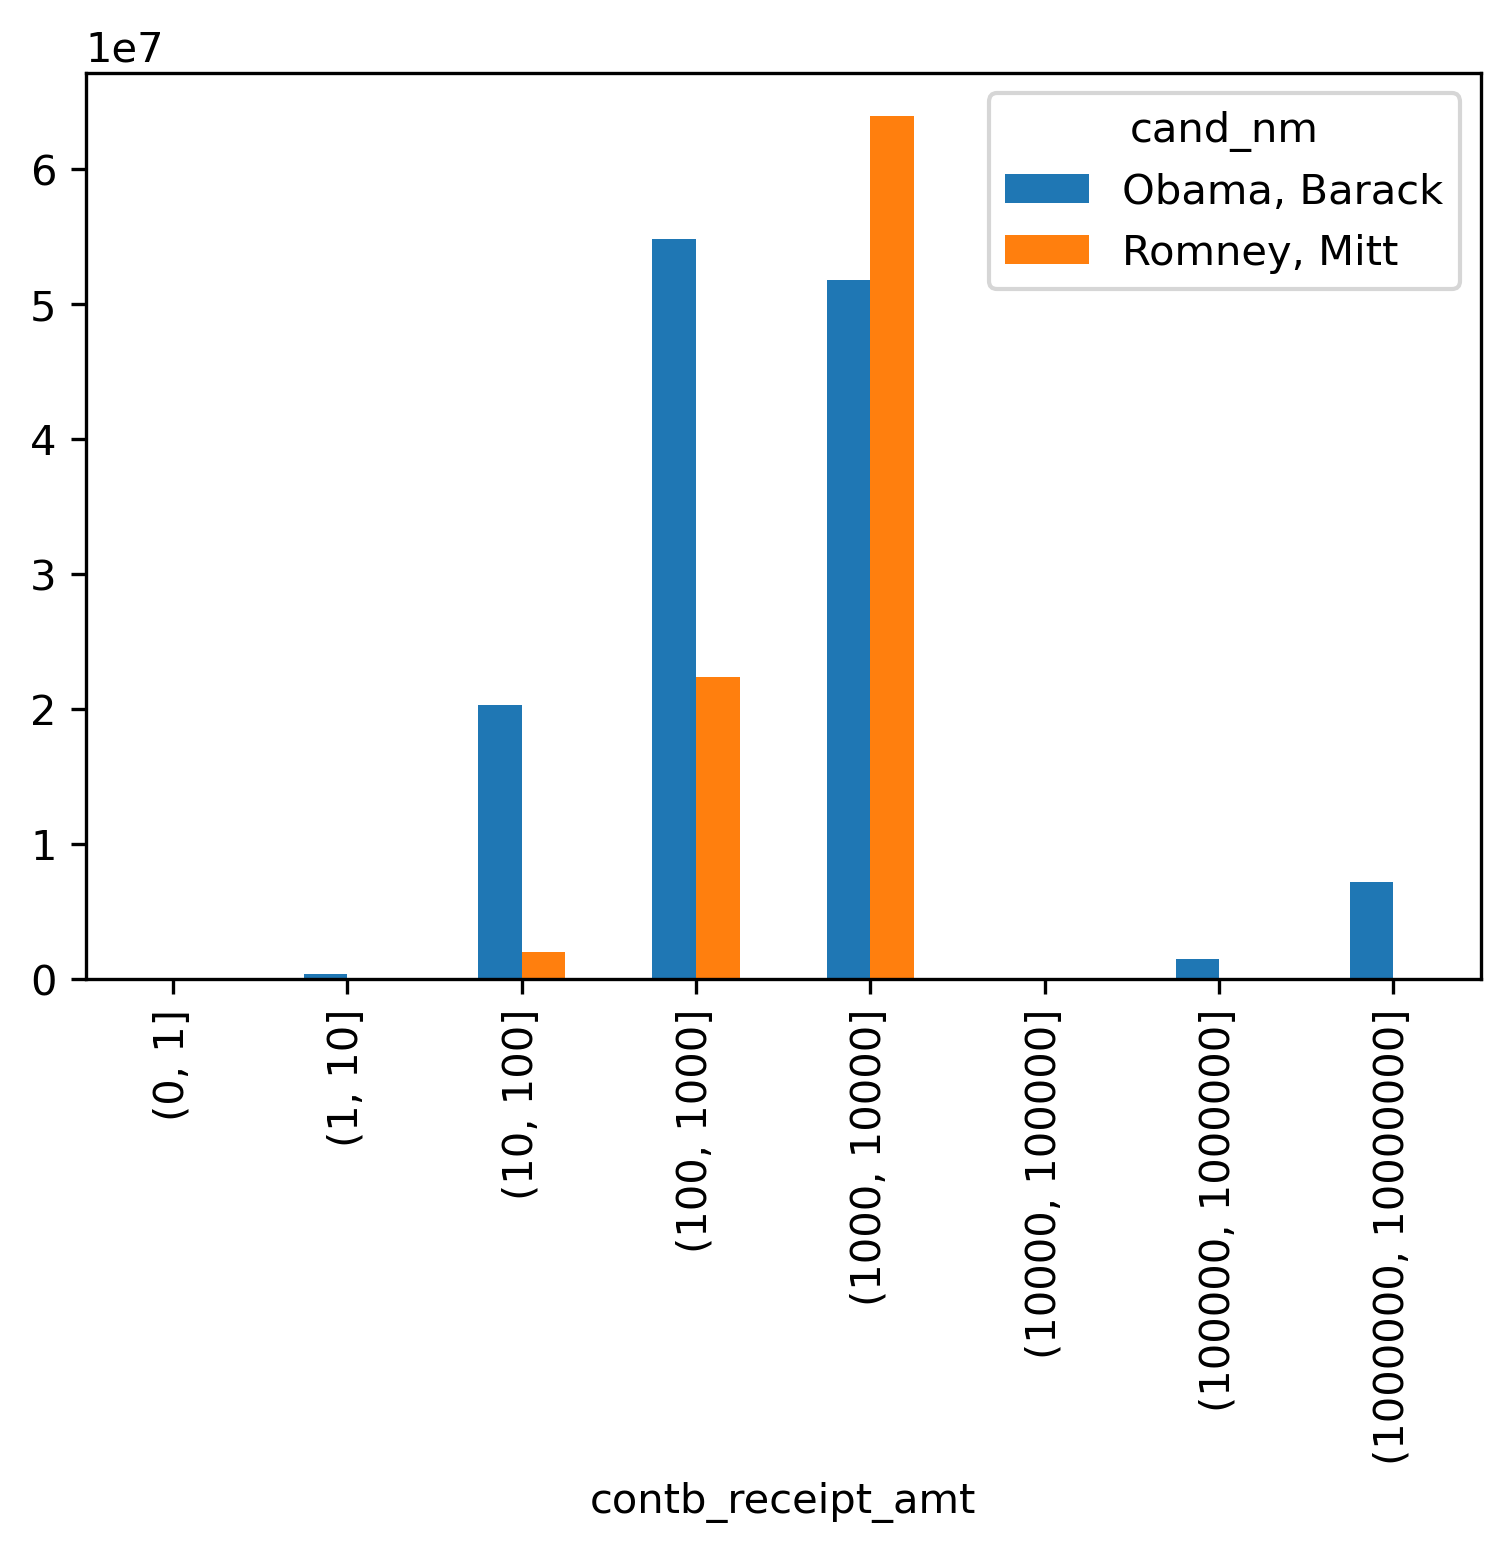

In [38]:
# Obama、Romney各区间赞助总金额
bucket_sums.plot(kind='bar')

In [39]:
# 算出每个区间两位候选人收到赞助总金额的占比
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710177,0.289823
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


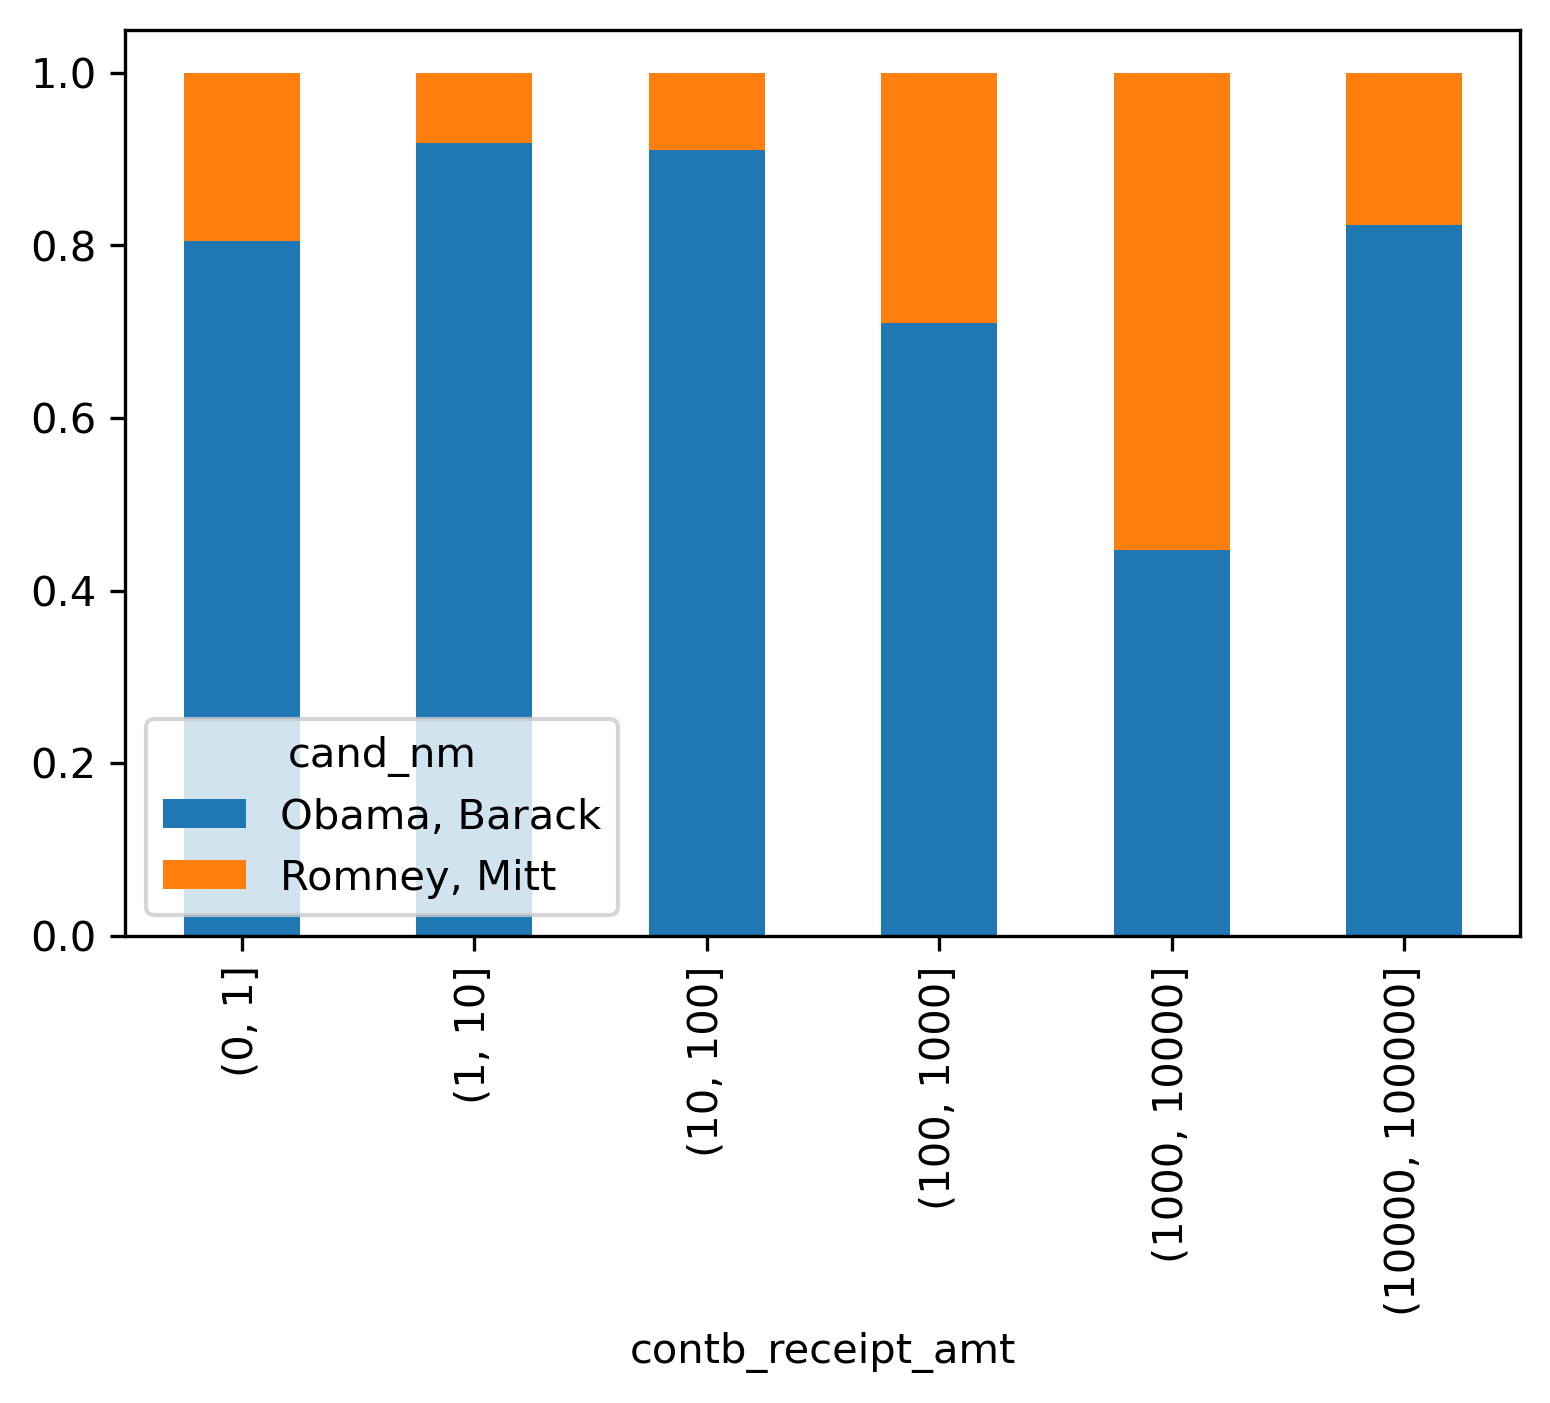

In [40]:
# 使用柱状图，指定stacked=True进行堆叠，即可完成百分比堆积图
normed_sums[:-2].plot(kind='bar',stacked=True)

In [41]:
data.groupby('contbr_nm')['contbr_nm'].count().sort_values(ascending=False)[:20]

contbr_nm
WILLIAMS, DEBBY          205
BERKE, DAVID MICHAEL     171
SEBAG, DAVID             161
SMITH, ERIK              145
FALLSGRAFF, TOBY         138
SKINNER, DONNA           136
CASPERSON, CAROLINA      132
HARRIS, CLAUDIA W.       132
ROSBERG, MARILYN         115
POTTS, LILLIE            114
DUDLEY, DEBBIE           111
HAUGHEY, NOEL ANTHONY    107
DFHDFH, DFHDFH            96
SHERWIN, GLEN R.          94
MITCHELL, CAITLIN         90
SMITH, CHARLES            88
KARIMIAN, AFSANEH         87
NURU, ISAAC               87
MASTERS, MARGERY          85
BIRMINGHAM, TOM           85
Name: contbr_nm, dtype: int64

In [42]:
data_vs

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


In [43]:
data_vs['time'] = pd.to_datetime(data_vs['contb_receipt_dt'])

In [44]:
data_vs

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party,time
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican,2012-02-01
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican,2012-02-01
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican,2012-04-13
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican,2011-08-21
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican,2012-03-07
...,...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat,2012-02-26
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat,2012-01-20
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat,2012-01-20
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat,2012-04-26


In [45]:
data_vs.set_index('time',inplace=True)
data_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
time,,,,,,,,
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
2012-04-13,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
2011-08-21,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
2012-03-07,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican


In [46]:
vs_time = data_vs.groupby('cand_nm').resample('M')['cand_nm'].count()
vs_time.unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
time,,
2011-04-30,13830,1096
2011-05-31,12182,4163
2011-06-30,25626,5757
2011-07-31,12372,2454
2011-08-31,19860,3226
2011-09-30,46927,7968
2011-10-31,25941,5349
2011-11-30,32629,7737
2011-12-31,63562,10289


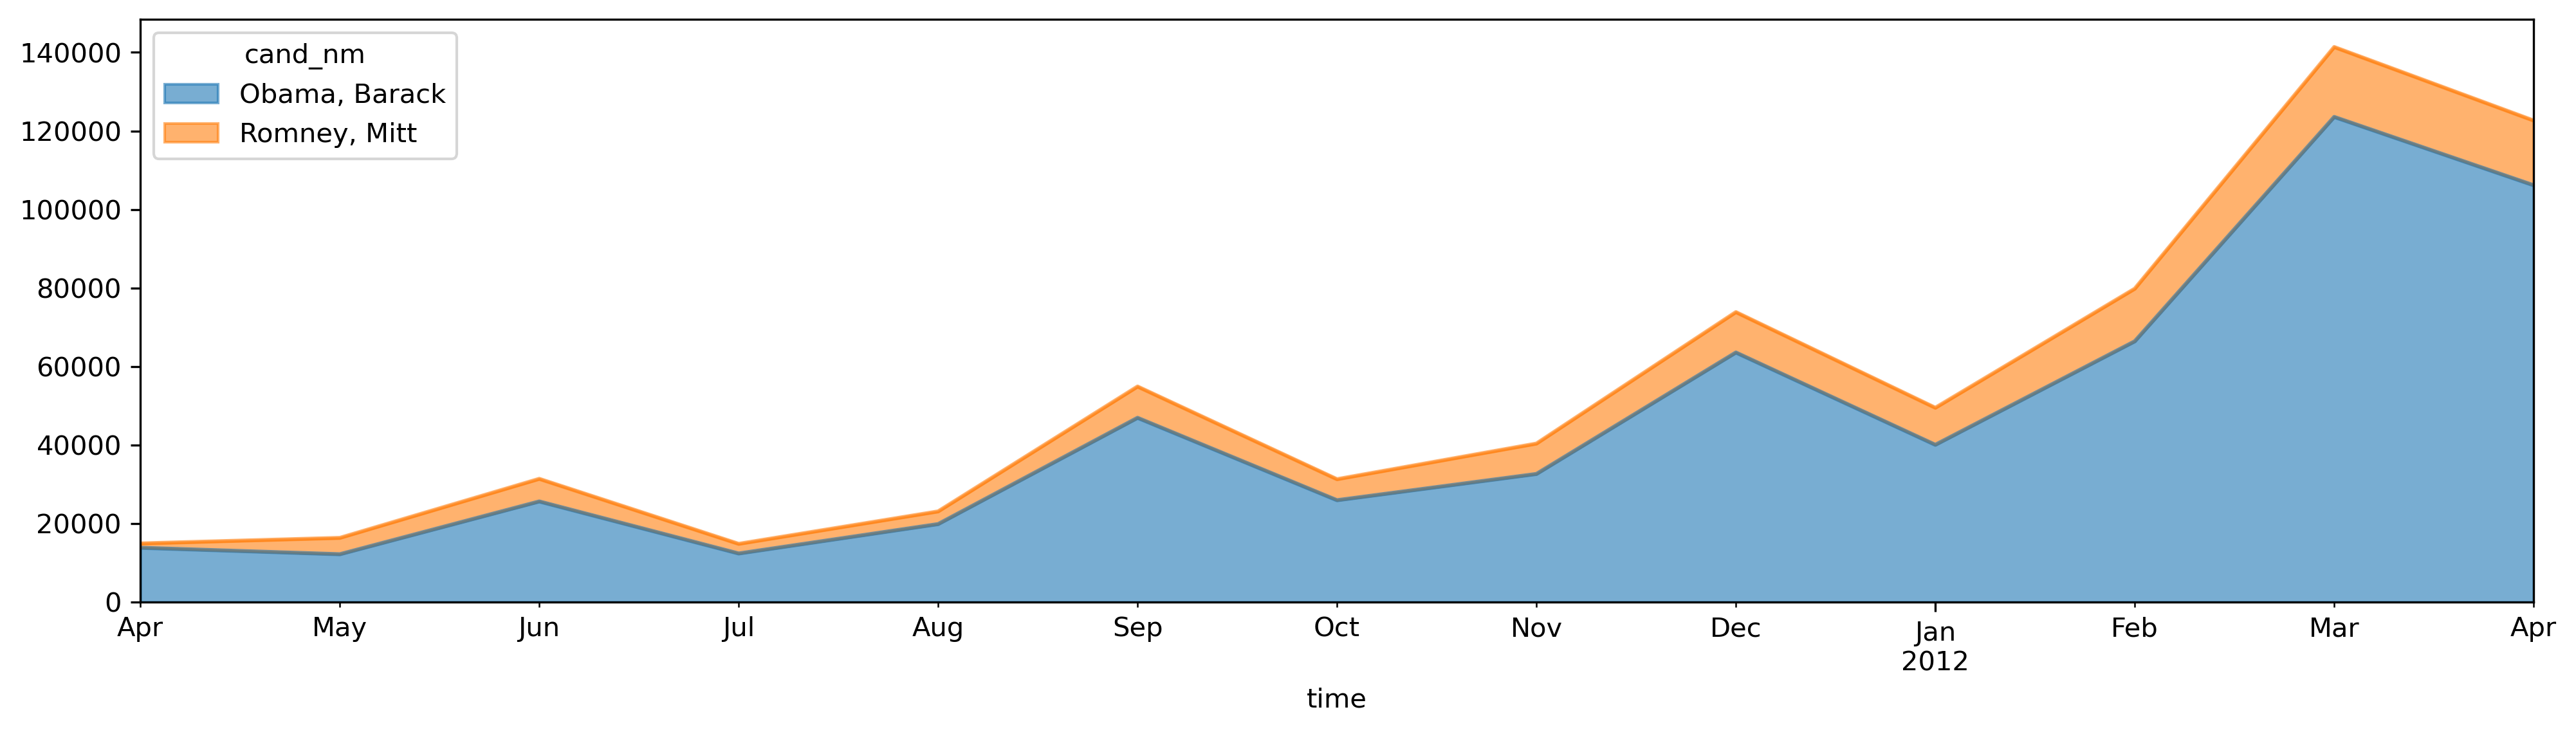

In [49]:
fig1, ax1=plt.subplots(figsize=(16,4), dpi=300)
vs_time.unstack(0).plot(kind='area',ax=ax1,alpha=0.6)
plt.show()